# 5.1 Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a data exploration technique used to understand the **various aspects of data** before applying any statistical or machine learning models.

EDA involves a **sequence of techniques** aimed at:
- Understanding the structure of the data
- Identifying missing, null, or redundant values
- Cleaning noise that may affect accuracy
- Understanding relationships between variables
- Deriving meaningful insights for decision-making

---

## Objectives of EDA

1. **Identify faulty data points**
   - Missing values
   - Duplicate records
   - Inconsistent entries

2. **Clean the data**
   - Remove noise, redundancy, and irrelevant columns
   - Improve data quality

3. **Understand relationships between variables**
   - Gain a wider perspective on how variables interact

4. **Extract insights**
   - Draw meaningful conclusions for interpretation and modeling

---

## Steps Involved in EDA

---

## 1. Understanding the Data

### Import Required Libraries
 - `import pandas as pd`
 - `import numpy as np`
 - `import matplotlib.pyplot as plt`
 - `import seaborn as sns`
### Load the Dataset
`data = pd.read_csv("data.csv")`
### Basic Data Inspection
 - `data.head()`     # First 5 rows
 - `data.tail(2)`     # Last 2 rows
 - `data.shape`       # Number of rows & columns
### Summary Statistics
 - `data.describe()`
 - Provides statistics for numerical columns:
    - count
    - mean
    - standard deviation (std)
    - min, max
    - 25%, 50%, 75% (quartiles)

### Column Information
 - `data.columns`
 - `data.dtypes`
### Unique Observations
 - `data.nunique()`
 - `data["column_name"].unique()`

## 2. Data Cleaning
### Handling Missing Values
 - `data.isnull()`
 - `data.isnull().sum()`

### Drop Missing Values
 - `data.dropna()`

### Fill Missing Values
 - `data.fillna(0)`
 - `data.fillna(method="ffill")`
 - `data.fillna(method="bfill")`

### Removing Redundant Columns
 - `data = data.drop(["Unnecessary_Column"], axis=1)`

### Outlier Detection
 - Outliers are values that differ significantly from others and may occur due to:
    - Measurement errors
    - Experimental errors
    - Natural variability
(Handled using visualization or statistical methods)

## 3. Relationship Analysis
### Correlation Matrix
 - A correlation matrix shows the correlation coefficient between variables.
 - `corr = data.corr()`

### Heatmap for Correlation
 - `sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm", annot=True)`

### Pair Plot
 - Used to visualize relationships between all numerical variables.
 - `sns.pairplot(data)`


### Scatter Plot
 - Shows the relationship between two numerical variables.
 - `sns.scatterplot(x="math_score", y="reading_score", hue="gender", data=data)`

### Histogram
 - Used to understand distribution, shape, and spread of numerical data.
 - `sns.histplot(data["math_score"], bins=5)`


### Categorical Plot
 - Used to analyze categorical variables.
 - `sns.catplot(x="gender", kind="box", data=data)`

---

 ## Summary
 - EDA is a crucial step before modeling
 - Helps ensure data quality and reliability
 - Identifies patterns, trends, relationships, and anomalies
 - Forms the foundation for accurate analysis and prediction

# 5.2 Summary Statistics

**Summary statistics** are numerical measures that **summarize important features of data**, often using a single number.
Producing **descriptive statistics** is usually the **first step** after cleaning and preparing a dataset for analysis.

## 5.2.1 Measures of Central Tendency
 - These give a sense of the **center** or **typical value** of a numerical variable.
 - In skewed distributions, the mean is pulled toward outliers, while the median remains stable.

In [1]:
import pandas as pd

# Load dataset (make sure file is inside Python DA/Data folder OR same folder as notebook)
df = pd.read_csv(
    "Data/sales_data_sample.csv",
    encoding="latin1"
)

# View top rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 1) Mean
- Arithmetic average of values
- Influenced by **outliers**

In [3]:
df["PRICEEACH"].mean()

np.float64(83.65854410201914)

 ### 2) Median
 - Middle value of the distribution
 - Separates data at the 50th percentile
 - Half of the data lies below and half above
 - Resistant to outliers

In [5]:
df["PRICEEACH"].median()

95.7

 ### 3) Mode
 - Most frequently occurring value
 - Useful for categorical data

In [6]:
df["PRICEEACH"].mode()

0    100.0
Name: PRICEEACH, dtype: float64

 ## 5.2.2 Measures of Spread (Dispersion)
 - These describe how spread out the data is
 - Variance and standard deviation are susceptible to skewness and outliers.

 ### 4) Range
Difference between maximum and minimum values

In [7]:
df["PRICEEACH"].max() - df["PRICEEACH"].min()

73.12

 ### 5) Quantiles & Percentiles
 - 25% → First Quartile (Q1)
 - 50% → Median (Q2)
 - 75% → Third Quartile (Q3)

In [9]:
Q1 = df["PRICEEACH"].quantile(0.25)
print(Q1)

Q2 = df["PRICEEACH"].quantile(0.50)
print(Q2)

Q3 = df["PRICEEACH"].quantile(0.75)
print(Q3)

68.86
95.7
100.0


 ### 6) Interquartile Range (IQR)
 - Distance between Q3 and Q1
 - Measures spread of the middle 50% of data

In [10]:
IQR = df["PRICEEACH"].quantile(0.75) - df["PRICEEACH"].quantile(0.25)
print(IQR)

31.14


 ### 7) Variance
 - Average of squared deviations from the mean
 - Sensitive to outliers

In [11]:
df["PRICEEACH"].var()

407.0014334217844

 ### 8) Standard Deviation
 - Square root of variance
 - Shows how far values typically deviate from the mean

In [12]:
df["PRICEEACH"].std()

20.174276527840703

 ### 9) Median Absolute Deviation (MAD)
 - Robust measure of spread
 - Less affected by outliers

In [14]:
abs_dev = abs(df["PRICEEACH"] - df["PRICEEACH"].median())
mad = abs_dev.median()
print(mad)

4.299999999999997


 ## 5.2.3 Skewness & Kurtosis

 ### 10) Skewness
 - Measures asymmetry of a distribution
    - 0 → Symmetric
    - Positive → Right-skewed
    - Negative → Left-skewed

In [21]:
df["PRICEEACH"].skew()

np.float64(-0.9466488589840762)

 ### 11) Kurtosis
 - Measures tailedness of distribution
    - Normal → Mesokurtic
    - Heavy tails → Leptokurtic
    - Light tails → Platykurtic

In [24]:
df["PRICEEACH"].kurt()

np.float64(-0.37481769302763945)

 ## 5.2.4 Summary Table (describe())
  - Includes:
    - count
    - mean
    - std
    - min
    - 25%
    - 50%
    - 75%
    - max

In [25]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## 5.2.5 When to Use Which Measure?

| Scenario | Preferred Measure |
|---|---|
| Skewed data | Median |
| Presence of outliers | Median, MAD (Median Absolute Deviation) |
| Categorical data | Mode |
| Income / financial data | Median |
| Widely spread data | Standard Deviation, IQR (Interquartile Range) |
| Clustered data | Low standard deviation |

---

 ### Key Takeaways
 - **Mean** → Sensitive to outliers
 - **Median** → Robust & reliable
 - **Mode** → Best for categorical data
 - **Variance** & **Std** → Measure variability
 - **IQR** & **MAD** → Robust spread measures
 - **Skewness** & **Kurtosis** → Shape & tails
 - Summary statistics provide a quick yet powerful understanding of data behavior before deeper analysis.

# 5.3 Distribution Analysis

**Distribution analysis** helps us understand how values of a variable are spread across a range. It reveals the **shape, center, spread, and outliers** of data.

## 1) Histogram

A **histogram** shows the **frequency distribution** of numerical data by grouping values into bins.

### What Histograms Help Detect
- **Skewness** (left / right)
- **Spread** of data
- **Shape of distribution**
  - Normal
  - Uniform
  - Bimodal

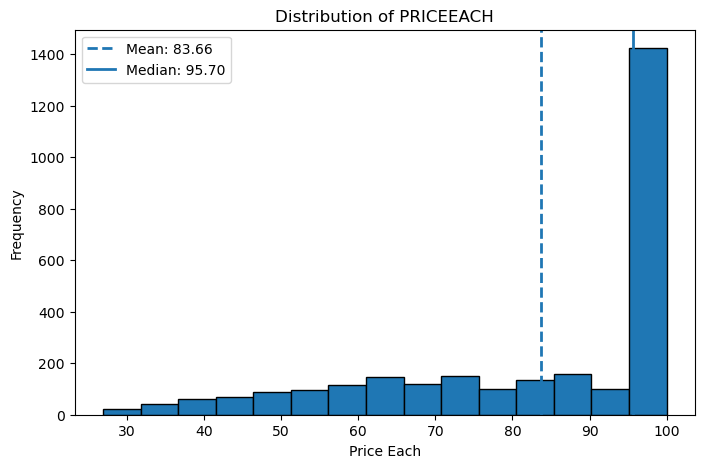

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = df["PRICEEACH"]

# Calculate statistics
mean_val = np.mean(data)
median_val = np.median(data)

plt.figure(figsize=(8,5))

# Histogram
plt.hist(data, bins=15, edgecolor='black')

# Mean & Median lines
plt.axvline(mean_val, linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, linestyle='-', linewidth=2, label=f"Median: {median_val:.2f}")

# Labels & title
plt.title("Distribution of PRICEEACH")
plt.xlabel("Price Each")
plt.ylabel("Frequency")

# Legend
plt.legend()

plt.show()

 ### 📊 Histogram Distribution Analysis – PRICEEACH
#### 1️⃣ Distribution Shape
 - The distribution is negatively skewed (left-skewed).
 - **Evidence**:
    - Mean (83.66) < Median (95.70)
    - Longer tail on the left side (lower prices)
 - 📌 **Interpretation**: Most products are priced towards the higher end, with fewer low-priced items.

 #### 2️⃣ Data Concentration
 - A very high frequency near 100 indicates:
 - Many products have prices close to the maximum value
 - Possible price ceiling or MSRP cap
 - 📌 **Interpretation**: Pricing strategy likely clusters products near a premium price point.

#### 3️⃣ Central Tendency

| Metric | Value | Insight |
|---|---|---|
| Mean | 83.66 | Pulled down by lower-priced items |
| Median | 95.70 | Typical selling price |

 - 📌 **Conclusion**: The median is a better representative of the typical price than the mean.

 #### 4️⃣ Spread & Variability
 - Prices range approximately from ~27 to 100
 - Wide spread indicates:
 - Multiple pricing tiers
 - Budget to premium products coexist

 #### 5️⃣ Potential Outliers
 - Very few observations below 30–40
 - These may be:
    - Discounted items
    - Promotional products
    - Clearance sales
 - 📌 **Recommended check**: Confirm using a box plot or IQR method

 #### 6️⃣ Business / Data Insight
“Most products are sold at higher price points, indicating a premium-heavy catalog.Lower-priced products exist but are limited and impact the mean.”

 ## 2) Kernel Density Estimation (KDE)
 - Kernel Density Estimation (KDE) provides a smooth probability density curve representing the distribution of data.
 - Instead of focusing only on exact values, KDE:
    - Considers the neighborhood around each data point
    - Places a bell-shaped curve at each observation
    - Combines them to form a smooth distribution curve
 - This helps estimate the probability of finding values near observed points.

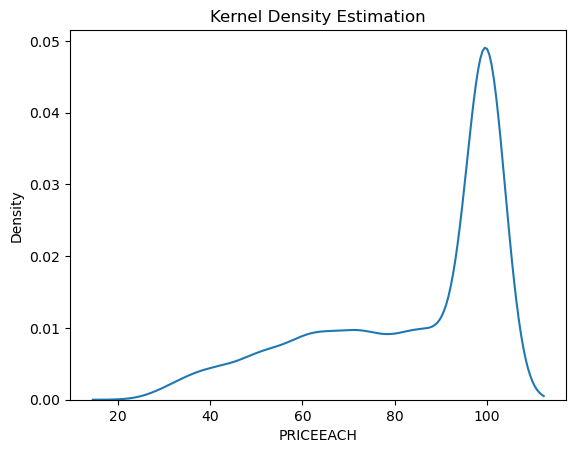

In [32]:
import seaborn as sns
sns.kdeplot(df["PRICEEACH"])
plt.title("Kernel Density Estimation")
plt.show()

 ### 📈 KDE Plot – PRICEEACH (Distribution Insights)
 #### 1️⃣ Overall Shape
 - The KDE curve is left-skewed (negatively skewed).
 - **Evidence**:
    - Long left tail toward lower prices (~20–60)
    - Sharp peak near the upper price range
 - 📌 **Interpretation**: Most values are concentrated at higher prices, with fewer low-priced items.

 #### 2️⃣ Peak Density (Mode)
 - The highest peak occurs around 95–100.
 - **This indicates**:
    - The most common selling price range
    - Strong clustering near a price cap or MSRP
 - 📌 **Business Insight**: Pricing strategy likely targets a premium band.

 #### 3️⃣ Lower-Price Region
 - Gradual, flatter density between 30–70
 - **Indicates**:
    - Presence of budget or discounted products
    - These values are less frequent, but spread out
 - 📌 **Statistical Impact**: These lower values pull the mean below the median.

#### 4️⃣ Consistency with Other Plots

| Plot | Observation |
|---|---|
| Histogram | High bars near 100 |
| Box Plot | Median close to Q3 |
| KDE | Sharp peak near upper range |

**📌 Conclusion:** All plots consistently show price concentration at the higher end.

 #### 5️⃣ Skewness Confirmation
 - Mean < Median
 - Long left tail
 - Dense right cluster
 - ✅ Confirms negative skewness

 #### 6️⃣ Outlier Indication
 - Very low density below ~25–30
 - **Suggests**:
    - Rare price points
    - Potential discount or clearance items
 - 📌 **Recommendation**: Validate using IQR method or z-score.

 #### 🎤 Interview-Ready Summary
“The KDE plot shows a left-skewed distribution with a strong density peak near 95–100, indicating most products are priced at the higher end. Lower prices exist but are infrequent and mainly affect the mean.”

#### 🔍 When to Prefer KDE over Histogram
 - Smooth distribution view
 - Better shape interpretation
 - Easier skewness detection

 ## 3) Histogram + KDE Together

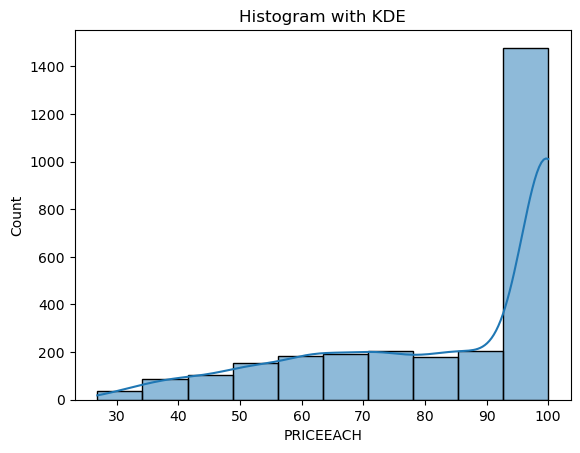

In [34]:
sns.histplot(df["PRICEEACH"], bins=10, kde=True)
plt.title("Histogram with KDE")
plt.show()

 ## 4) Box Plot
 - A box plot visualizes the five-number summary:
    - Minimum: First Quartile (Q1)
    - Median: Third Quartile (Q3)
    - Maximum: It also highlights outliers.

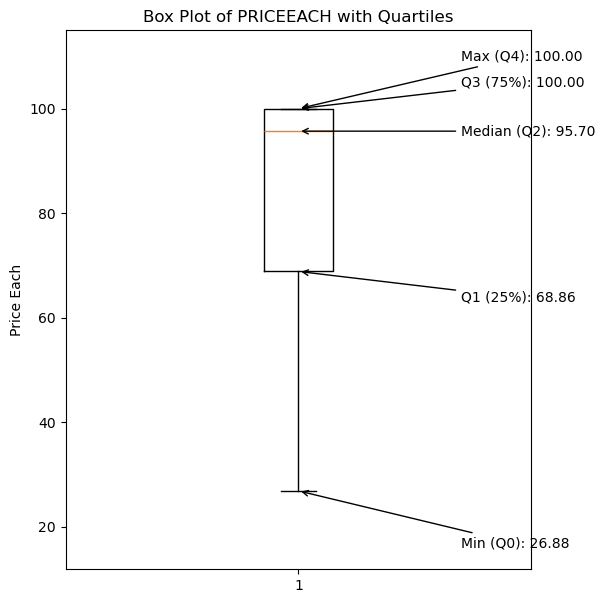

In [35]:
import matplotlib.pyplot as plt
import numpy as np

data = df["PRICEEACH"]

# Quartiles
Q0 = np.min(data)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
Q4 = np.max(data)

plt.figure(figsize=(6,7))
plt.boxplot(data, vert=True)

plt.title("Box Plot of PRICEEACH with Quartiles")
plt.ylabel("Price Each")

x = 1.0
text_x = 1.35   # fixed x position for labels

# Fixed vertical positions (top → bottom)
label_positions = {
    "Q4": Q4 + 10,
    "Q3": Q3 + 5,
    "Q2": Q2,
    "Q1": Q1 - 5,
    "Q0": Q0 - 10
}

# Annotations (NO overlap guaranteed)
plt.annotate(f"Max (Q4): {Q4:.2f}", xy=(x, Q4),
             xytext=(text_x, label_positions["Q4"]),
             arrowprops=dict(arrowstyle="->"), va="center")

plt.annotate(f"Q3 (75%): {Q3:.2f}", xy=(x, Q3),
             xytext=(text_x, label_positions["Q3"]),
             arrowprops=dict(arrowstyle="->"), va="center")

plt.annotate(f"Median (Q2): {Q2:.2f}", xy=(x, Q2),
             xytext=(text_x, label_positions["Q2"]),
             arrowprops=dict(arrowstyle="->"), va="center")

plt.annotate(f"Q1 (25%): {Q1:.2f}", xy=(x, Q1),
             xytext=(text_x, label_positions["Q1"]),
             arrowprops=dict(arrowstyle="->"), va="center")

plt.annotate(f"Min (Q0): {Q0:.2f}", xy=(x, Q0),
             xytext=(text_x, label_positions["Q0"]),
             arrowprops=dict(arrowstyle="->"), va="center")

# Expand y-axis so labels are visible
plt.ylim(Q0 - 15, Q4 + 15)

plt.show()

### Comparison of Distribution Plots

| Plot Type | Purpose |
|---|---|
| Histogram | Frequency & shape |
| KDE Plot | Smooth density estimation |
| Box Plot | Median, quartiles & outliers |

#### Key Takeaways

- **Histograms** reveal frequency patterns
- **KDE plots** show smooth distribution trends  
- **Box plots** summarize data and detect outliers
- Use all three together for strong distribution insights

Distribution analysis is a core step in EDA, helping ensure data quality and guiding further modeling decisions.

## 5.4 Outlier Detection

An **outlier** is a data point that is **significantly far** from other values in a
dataset. It can be an **extreme high or low value** that skews results such as the mean.

Outliers are problematic because they:
- Disproportionately influence statistical results
- Skew measures like mean and standard deviation
- Distort correlations
- Reduce model performance

## 1) IQR Method (Interquartile Range)
A **robust statistical technique** that focuses on the **middle 50%** of the data.

### Steps

#### 1. Compute Quartiles  
   - Q1 → 25th percentile  
   - Q3 → 75th percentile  

In [37]:
Q1 = df["PRICEEACH"].quantile(0.25)
print(Q1)

Q3 = df["PRICEEACH"].quantile(0.75)
print(Q3)

68.86
100.0


 #### 2. Compute IQR

In [38]:
IQR = Q3 - Q1
print(IQR)

31.14


 #### 3. Define Limits

In [39]:
lower_limit = Q1 - 1.5 * IQR
print(lower_limit)

upper_limit = Q3 + 1.5 * IQR
print(upper_limit)

22.15
146.71


 #### 4. Detect Outliers

In [41]:
outliers = df[(df["PRICEEACH"] < lower_limit) | (df["PRICEEACH"] > upper_limit)]
print(outliers)

Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

[0 rows x 25 columns]


 #### 5. Remove Outliers (if required)

In [44]:
df_clean = df[(df["PRICEEACH"] >= lower_limit) & (df["PRICEEACH"] <= upper_limit)]
df_clean.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


 ## 2) Z-Score Method
 - Measures how many standard deviations a data point is away from the mean.
 - Formula: `Z = (x − mean) / standard deviation`

In [49]:
mean = df["PRICEEACH"].mean()
std = df["PRICEEACH"].std()

df["zscore"] = (df["PRICEEACH"] - mean) / std
print("\n", df["zscore"], "\n")

#Detect Outliers
outliers = df[(df["zscore"] > 3) | (df["zscore"] < -3)]
print("\n", outliers, "\n")

#Remove Outliers
df_clean = df[(df["zscore"] <= 3) & (df["zscore"] >= -3)]
df_clean.head()


 0       0.596872
1      -0.114430
2       0.549286
3      -0.019755
4       0.810014
          ...   
2818    0.810014
2819    0.810014
2820    0.810014
2821   -1.061676
2822   -0.899093
Name: zscore, Length: 2823, dtype: float64 


 Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE, zscore]
Index: []

[0 rows x 26 columns] 



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,zscore
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0.596872
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,-0.114430
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,0.549286
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,-0.019755
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,0.810014


 ## 3) Handling Outliers (Important!)
 - Outliers should not be blindly removed.
 - Possible Actions:
    - Remove (if due to data entry or measurement error)
    - Cap / Winsorize values
    - Transform data (log, sqrt)
    - Keep them (if meaningful in business context)
 - ⚠️ Always handle outliers based on domain knowledge and business context, not just statistical rules.

###  Summary: Outlier Detection Methods

| Method | Best Use |
|---|---|
| IQR | Robust, works well for skewed data |
| Z-Score | Works well for normally distributed data |
| Removal | Only when justified (e.g., data entry errors) |
| Business Context | Always essential to understand impact |

**Key Insight:** Outlier detection is a critical step in EDA that improves data quality and model reliability.

# 5.5 Correlation Analysis

**Correlation analysis** measures the **strength and direction of the linear relationship** between two numerical variables.

The result is a **correlation coefficient**:
- Range: **-1 to +1**
- `+1` → Perfect positive correlation
- `-1` → Perfect negative correlation
- `0` → No linear correlation

## 1) Correlation Matrix

A **correlation matrix** shows pairwise correlations between **all numerical
features** in a dataset.

It helps to:
- Identify strongly related variables
- Detect multicollinearity
- Find redundant or overlapping features

In [51]:
import pandas as pd

corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,zscore
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280,-0.002935
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881,0.005564
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625,1.000000
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067,-0.020965
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239,0.657841
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234,0.008712
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170,0.005152
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310,-0.005938
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000,0.670625
zscore,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625,1.000000


 ## 2) Heatmap for Correlation Matrix
A heatmap visually represents the correlation matrix using colors, making patterns easier to spot.

 ### Basic Heatmap

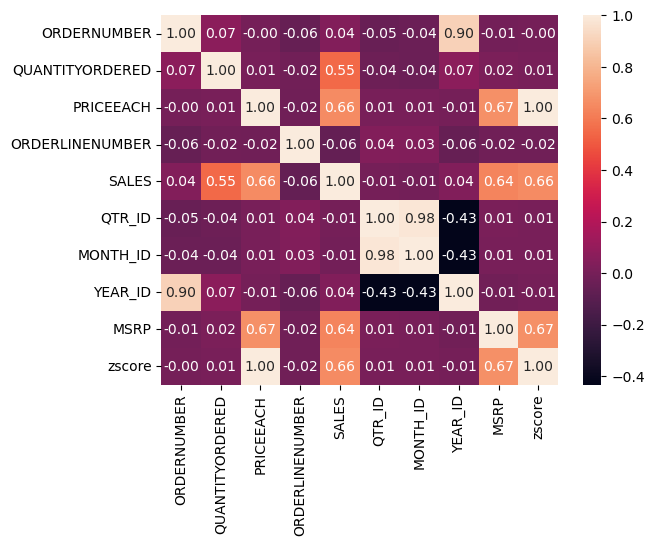

In [54]:
#Basic Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

 ### Styled Heatmap (Recommended)

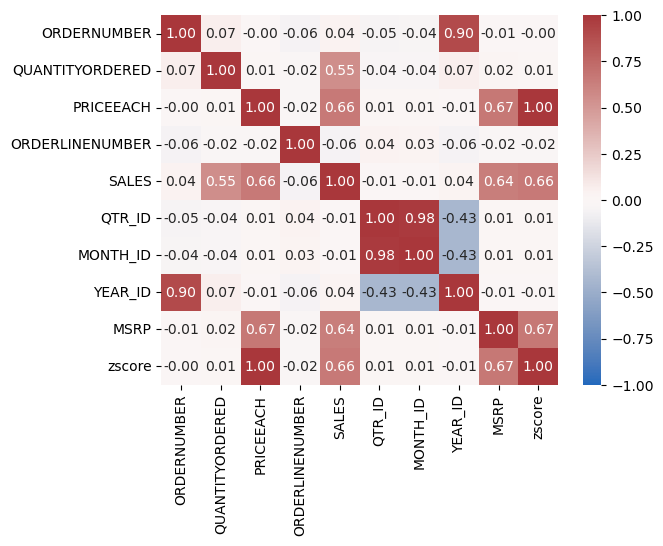

In [55]:
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    cmap="vlag"
)
plt.show()


 ## 3) Masking Upper Triangle (Cleaner Visualization)
Since the correlation matrix is symmetric, we often hide the upper triangle.

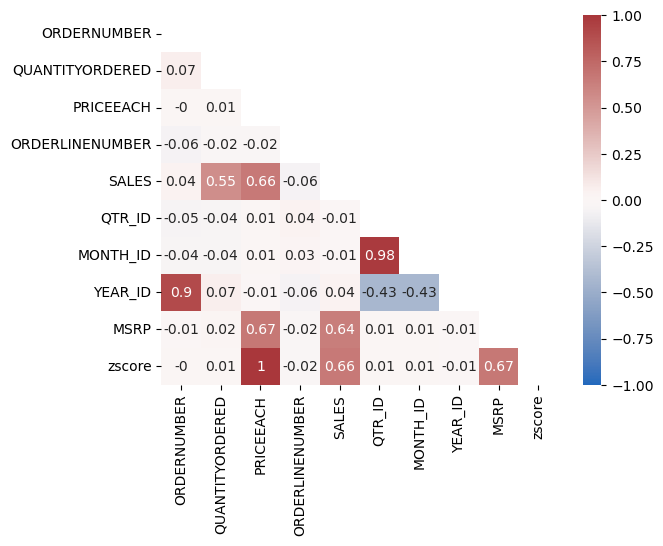

In [56]:
import numpy as np

matrix = df.select_dtypes(include='number').corr().round(2)

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(
    matrix,
    mask=mask,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap="vlag"
)
plt.show()


## 4) Interpreting Correlation Values

| Correlation Value | Interpretation |
|---|---|
| 0.8 to 1.0 | Strong positive correlation |
| 0.5 to 0.8 | Moderate positive correlation |
| 0.0 to 0.5 | Weak positive correlation |
| 0 | No linear relationship |
| -0.5 to 0 | Weak negative correlation |
| -0.8 to -0.5 | Moderate negative correlation |
| -1.0 to -0.8 | Strong negative correlation |

---

## 5) Important Notes

- **Correlation does not imply causation**
- Works best for **linear relationships**
- Highly correlated features may cause **multicollinearity**
- Always combine correlation analysis with **domain knowledge**

---

### Summary

- `df.corr()` → numerical correlation matrix
- Heatmaps help **visualize relationships** clearly
- Masking improves readability
- Essential step in **Exploratory Data Analysis (EDA)** and **feature selection**

# 5.6 Data Quality Check

**Data Quality Check** is the process of assessing data to ensure it is:
- **Accurate**
- **Complete**
- **Consistent**
- **Reliable**

It is a **mandatory step before analysis or modeling**.

## 1) Missing Values
Missing data can bias results and reduce model performance.

In [57]:
df.isnull()
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
zscore                 0
dtype: int64

 ## 2) Visualize Missing Values

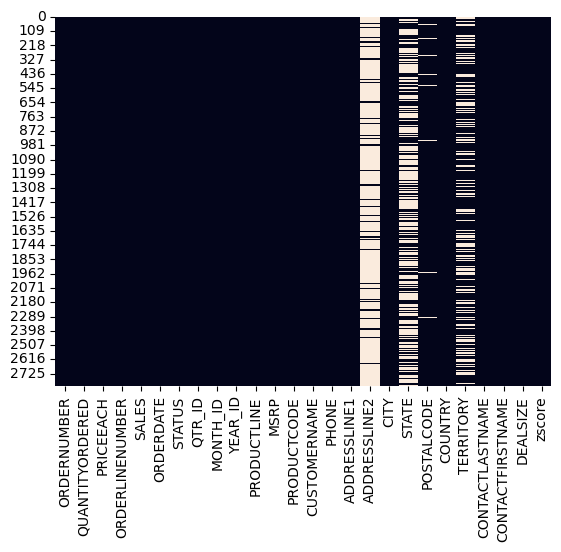

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

 ## 3) Handling Missing Values

 #### a) Drop Rows / Columns

In [59]:
df.dropna(inplace=True)

 #### b) Mean / Median Imputation (Numerical)

In [60]:
#df['Age'].fillna(df['Age'].mean(), inplace=True)
#df['Salary'].fillna(df['Salary'].median(), inplace=True)

 #### c) Mode Imputation (Categorical)

In [62]:
df.fillna({
    'STATE': df['STATE'].mode()[0],
    'TERRITORY': df['TERRITORY'].mode()[0]
}, inplace=True)

 #### d) Forward / Backward Fill (Time Series)

In [63]:
#df.fillna(method='ffill', inplace=True)
#df.fillna(method='bfill', inplace=True)

 ## 2) Duplicate Records
 - Duplicates can inflate counts and distort analysis.
 - 📌 Common causes:
    - Incorrect joins
    - System logging errors
    - Data ingestion issues

 #### a) Detect Duplicates

In [64]:
df.duplicated().sum()

np.int64(0)

 #### b) Remove Duplicates

In [65]:
df.drop_duplicates(inplace=True)

 ## 3) Invalid Entries
 - Values that violate logical or business constraints.
 - Such values must be validated and corrected or removed.

In [66]:
df = df[(df['QUANTITYORDERED'] > 0) &
        (df['PRICEEACH'] > 0) &
        (df['SALES'] > 0) &
        (df['MSRP'] > 0)]

#✔️ Convert & Detect Invalid Dates
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Rows with invalid dates
df[df['ORDERDATE'].isna()]

#✔️ Remove Invalid Dates
df = df.dropna(subset=['ORDERDATE'])

#✔️ Detect Invalid Quarter
df[~df['QTR_ID'].isin([1, 2, 3, 4])]

#✔️ Remove Invalid Values
df = df[df['QTR_ID'].isin([1, 2, 3, 4])]

#✔️ Find Invalid Sales Records
df[df['SALES'] != df['QUANTITYORDERED'] * df['PRICEEACH']]

#✔️ Correct SALES
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

#✔️ Detect Empty Strings
df[df['CITY'].str.strip() == ""]

#✔️ Replace with NaN
df['CITY'].replace("", pd.NA, inplace=True)

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,zscore
10,10223,37,100.00,1,3700.0,2004-02-20,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,0.810014
21,10361,20,72.55,13,1451.0,2004-12-17,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,-0.550629
40,10270,21,100.00,9,2100.0,2004-07-19,Shipped,3,7,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,0.810014
47,10347,30,100.00,1,3000.0,2004-11-29,Shipped,4,11,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,0.810014
51,10391,24,100.00,4,2400.0,2005-03-09,Shipped,1,3,2005,...,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,0.810014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.0,2003-04-29,Shipped,2,4,2003,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,-0.379619
2673,10223,26,67.20,15,1747.2,2004-02-20,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small,-0.815818
2685,10361,44,100.00,10,4400.0,2004-12-17,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,0.810014
2764,10361,35,100.00,11,3500.0,2004-12-17,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,0.810014


 ## 4) Range Checks
Ensure values fall within realistic bounds.

In [68]:
#✔️ Detect Out-of-Range Values
df[
    (df['QUANTITYORDERED'] < 1) | (df['QUANTITYORDERED'] > 100) |
    (df['PRICEEACH'] < 1) | (df['PRICEEACH'] > 100) |
    (df['MSRP'] < 1) | (df['MSRP'] > 200)
]

#✔️ Remove Invalid Rows
df = df[
    (df['QUANTITYORDERED'].between(1, 100)) &
    (df['PRICEEACH'].between(1, 100)) &
    (df['MSRP'].between(1, 200))
]

#Orders should be within business years (e.g., 2000–2025)
#df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

df = df[
    (df['ORDERDATE'].dt.year >= 2000) &
    (df['ORDERDATE'].dt.year <= 2025)
]

#🔴 Allowed Values
valid_quarters = [1, 2, 3, 4]
valid_months = list(range(1, 13))

df = df[df['QTR_ID'].isin(valid_quarters)]
df = df[df['MONTH_ID'].isin(valid_months)]

#Postal Code Length Check (Optional)
df = df[df['POSTALCODE'].astype(str).str.len().between(5, 6)]

 ## 5) Data Type Validation
Incorrect data types can break analysis.

In [69]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
zscore                     float64
dtype: object

 ## 6) Business Rule Validation
 - Rules depend on domain context.
 - Examples:
    - Salary > 0
    - Age ≥ 18 for employees
    - Order Date ≤ Delivery Date
    - Gender ∈ {Male, Female, Other}

## Summary: Data Quality Checks

| Check Type | Purpose |
|---|---|
| Missing values | Ensure completeness |
| Duplicates | Avoid data inflation |
| Invalid entries | Maintain correctness |
| Range checks | Ensure realism |
| Data types | Prevent computation errors |
| Business rules | Domain correctness |

✅ **High-quality data = trustworthy analysis & better models**

# 5.7 Feature Engineering Basics

**Feature Engineering** is the process of using **domain knowledge** to transform raw data into meaningful **features (input variables)** that improve the performance of Machine Learning models.

It focuses on:
- Creating new features
- Selecting relevant features
- Modifying existing features  
to **increase model accuracy and interpretability**.

---

## Why Feature Engineering Matters

- ML models **do not understand raw data directly**
- Better features → **better patterns learned**
- Often **more impactful than choosing the model itself**

---
## Summary Table
 - **One-Hot Encoding** --> Nominal categorical data
 - **Label Encoding** --> Ordinal categorical data
 - **Standardization** --> Normally distributed data
 - **Min-Max Scaling** --> Bounded range data

---

## Key Interview Takeaways
 - ✅ Use One-Hot Encoding for unordered categories
 - ✅ Use Label Encoding only when order matters
 - ✅ Always scale features before distance-based models
 - ✅ Avoid dummy variable trap using drop_first=True

## Key Feature Engineering Techniques

### 1) Feature Creation

Creating new features from existing ones to reveal deeper insights, converting raw data into meaningful metrics.

In [1]:
import pandas as pd

# Create example data
data = {
    'Product': ['Laptop', 'Mobile', 'Tablet'],
    'Price': [50000, 20000, 30000],
    'Quantity': [2, 3, 1],
    'Weight': [70, 65, 80],        # in kg
    'Height': [1.75, 1.68, 1.80],  # in meters
    'Order_Date': ['2024-01-15', '2024-02-20', '2024-03-10']
}

df = pd.DataFrame(data)

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df

#Mathematical Combination
df['Total_Sales'] = df['Price'] * df['Quantity']

#Domain-Based Features
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

#Date-Based Features
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

#Final DataFrame Output
df

,Product,Price,Quantity,Weight,Height,Order_Date,Total_Sales,BMI,Year,Month,Day
0,Laptop,50000,2,70,1.75,2024-01-15,100000,22.857143,2024,1,15
1,Mobile,20000,3,65,1.68,2024-02-20,60000,23.030045,2024,2,20
2,Tablet,30000,1,80,1.80,2024-03-10,30000,24.691358,2024,3,10


### 2) Binning (Discretization)
 - Dividing continuous variables into groups or bins.
 - Why Binning?
    - Simplifies complex continuous data
    - Helps detect hidden patterns
    - Useful for segmentation
    - Useful when exact values are less important than ranges

In [2]:
import pandas as pd

# Create sample data
data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Neha', 'Suresh'],
    'Age': [12, 25, 42, 67, 18]
}

df = pd.DataFrame(data)
df

df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 35, 60, 100],
    labels=['Child', 'Young Adult', 'Adult', 'Senior']
)
df

,Name,Age,Age_Group
0,Amit,12,Child
1,Riya,25,Young Adult
2,Karan,42,Adult
3,Neha,67,Senior
4,Suresh,18,Child


 ### 3) Encoding Categorical Data
 - Converting non-numeric data into numerical form so algorithms can process it.
 - Categorical data represents characteristics or qualities that can be divided into different groups.
 - Types of Categorical Data
    - a) **Nominal (No Order)**
        - Examples: Gender, Color, City
    - b) **Ordinal (Ordered)**
        - Examples: Education level, Rating (Low → Medium → High)
 - Encoding Techniques (Based on Type of Data)
    - Encoding is the process of converting **categorical data** into **numerical form** so that Machine Learning models can understand it.
    - The two most common encoding techniques are:
        - 1. One-Hot Encoding
        - 2. Label Encoding

### 1) One-Hot Encoding (OHE)

#### When to Use
- Best for **nominal data** (no order between categories)
- Works well when the **number of categories is small to medium**

#### How It Works
- Creates **one new binary column for each category**
- Value = 1 → presence of category  
- Value = 0 → absence of category

In [4]:
import pandas as pd

# Create sample data
data = {
    'Name': ['Amit', 'Riya', 'Karan'],
    'City': ['Delhi', 'Mumbai', 'Pune']
}

df = pd.DataFrame(data)
df

,Name,City
0,Amit,Delhi
1,Riya,Mumbai
2,Karan,Pune


#### One-Hot Encoding (Without `drop_first`)
 - **Problem**:
    - All dummy columns are correlated → Dummy Variable Trap

In [5]:
#One-Hot Encoding (Without drop_first)
pd.get_dummies(df, columns=['City'])

,Name,City_Delhi,City_Mumbai,City_Pune
0,Amit,True,False,False
1,Riya,False,True,False
2,Karan,False,False,True


#### One-Hot Encoding (With `drop_first=True`)
 - 📌 **Interpretation**
    - City_Delhi is dropped
    - If both columns = 0 → City is Delhi
    - One column can be inferred from others

---

#### 🔹 Why drop_first=True?
 - ✔ Avoids Dummy Variable Trap
 - ✔ Prevents multicollinearity
 - ✔ Improves linear models (Linear Regression, Logistic Regression)

---

#### 🔹 When NOT to use drop_first=True
 - Tree-based models (Decision Tree, Random Forest)
 - When interpretability of all categories is needed

In [6]:
#One-Hot Encoding (With drop_first=True)
pd.get_dummies(df, columns=['City'], drop_first=True)

,Name,City_Mumbai,City_Pune
0,Amit,False,False
1,Riya,True,False
2,Karan,False,True


 ### 2) Label Encoding
 - **When to Use**
    - Best for ordinal data (categories have order)
    - ✅ Target variable (Yes/No, Pass/Fail)
    - ✅ Tree-based models (Decision Tree, Random Forest)
 - 🔹 When **NOT to Use** LabelEncoder?
    - ❌ Ordinal features with meaning (use mapping / OrdinalEncoder)
    - ❌ Linear models (introduces false magnitude)
 - **Examples**:
    - Education Level
    - Ratings (Low < Medium < High)
 - **How It Works**
    - Assigns a unique integer to each category based on order

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Neha'],
    'Education': ['High School', 'Bachelor’s', 'Master’s', 'Bachelor’s']
}

df = pd.DataFrame(data)
df

,Name,Education
0,Amit,High School
1,Riya,Bachelor’s
2,Karan,Master’s
3,Neha,Bachelor’s


 #### Label Encoding – Python Implementation
  - 📌 **Important Note** (Very Common Interview Trap)
    - LabelEncoder does NOT preserve logical order.
 - Actual mapping created:
    - Bachelor’s   → 0
    - High School → 1
    - Master’s    → 2
 - ⚠️ This order is alphabetical, not educational hierarchy.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education_Encoded'] = le.fit_transform(df['Education'])

df

,Name,Education,Education_Encoded
0,Amit,High School,1
1,Riya,Bachelor’s,0
2,Karan,Master’s,2
3,Neha,Bachelor’s,0


 #### Correct Way for Ordered Categories (Ordinal Encoding)
Since Education has a natural order, use manual mapping:

In [11]:
education_map = {
    'High School': 1,
    'Bachelor’s': 2,
    'Master’s': 3
}

df['Education_Ordinal'] = df['Education'].map(education_map)
df

,Name,Education,Education_Encoded,Education_Ordinal
0,Amit,High School,1,1
1,Riya,Bachelor’s,0,2
2,Karan,Master’s,2,3
3,Neha,Bachelor’s,0,2


 ### 3) Scaling (Normalization)
 - Scaling rescales numerical features to a common range so that features with large values do not dominate the model.
 - 📌 Crucial for:
    - K-NN
    - SVM
    - Neural Networks
    - Gradient Descent based models

 #### a) Standardization (Z-Score Scaling)
 - **Formula**: `X_scaled = (X − Mean) / Standard Deviation`
 - **Properties**
    - Mean = 0
    - Standard deviation = 1
    - Does not change the shape of the distribution
    - Less sensitive to outliers than Min-Max

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Neha'],
    'Salary': [30000, 50000, 80000, 120000]
}

df = pd.DataFrame(data)
df

scaler = StandardScaler()
df[['Salary_Scaled']] = scaler.fit_transform(df[['Salary']])

df

,Name,Salary,Salary_Scaled
0,Amit,30000,-1.179536
1,Riya,50000,-0.589768
2,Karan,80000,0.294884
3,Neha,120000,1.474420


 #### b) Min-Max Scaling
 - **Formula**: `X_scaled = (X − X_min) / (X_max − X_min)`
 - **Properties**
    - Scales data to range [0, 1]
    - Ensures no single feature dominates due to magnitude
    - Sensitive to outliers

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Salary_Scaled']] = scaler.fit_transform(df[['Salary']])

df

,Name,Salary,Salary_Scaled
0,Amit,30000,0.000000
1,Riya,50000,0.222222
2,Karan,80000,0.555556
3,Neha,120000,1.000000
